In [13]:
import numpy as np 
import os
import matplotlib.pyplot as plt
from yawisi.parameters import SimulationParameters
from yawisi.wind_field import WindField
from yawisi.display import display_points, display_wind
from yawisi.spectrum import Spectrum
from yawisi.locations import Locations, Grid
from yawisi.kernels import CoherenceKernel
from yawisi.wind import Wind
from tqdm import tqdm

### Rading Parameters

In [14]:
filename =  "config.ini"
params = SimulationParameters(filename)
params.n_samples = 1000
params.sample_time = 0.1
print(params)

Number of Samples Initialized @ 1000
Sample Time Initialized @ 0.1
Wind Mean Speed Initialized @ 10
turbulence length scale for longitudinal component @ 170.0
turbulence length scale for transversal component @ 100.0
turbulence length scale for vertical component @ 35.0
Std of wind fluctuation of the longitudinal component @ 2.6
std of wind fluctuation of the transversal component @  2.2
std of wind fluctuation of the vertical component @ 1.56
PL Exp Law initialized  @ 0.15
Reference Height @ 60.0
Ymin @ 0.0
Ymax @ 100.0
Zmin @ 60.0
Zmax @ 60.0



### Generating Wind object (single location)

In [20]:
wind = Wind(params)
wind.compute()

In [21]:
u = wind.wind_values[:, 0]
mean_u = np.mean(u)

std_u = np.std(u - mean_u)
print(
    mean_u,
    std_u,
    std_u * np.sqrt(params.sample_time),
    std_u / params.sigma_1,
)

10.0 2.3108674433672944 0.7307604491770813 0.8887951705258824


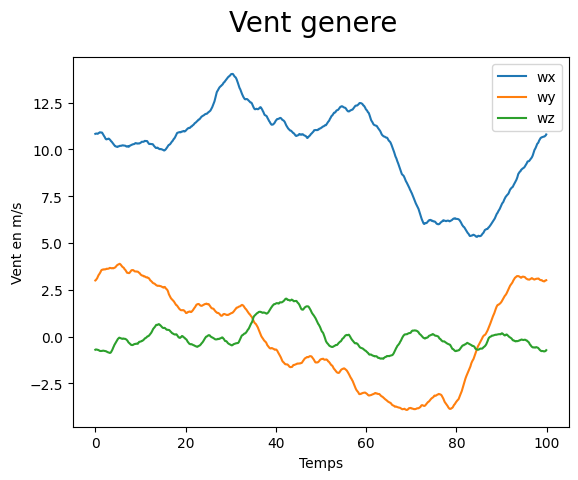

: 

In [22]:
display_wind(wind)

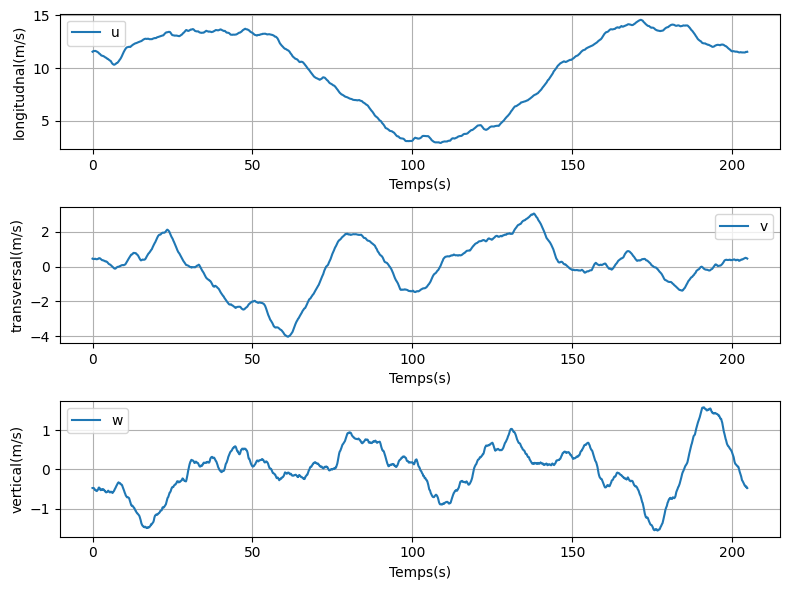

In [9]:
## pltot u v and w componenets separately 
Time = np.arange(start=0, stop=wind.params.total_time, step=wind.params.sample_time)
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(Time, wind.wind_values[:, 0], label="u")
ax2.plot(Time, wind.wind_values[:, 1], label="v")
ax3.plot(Time, wind.wind_values[:, 2], label="w")

ax1.set_ylabel("longitudnal(m/s)")
ax1.set_xlabel("Temps(s)")
ax1.legend()
ax1.grid()
ax2.set_ylabel("transversal(m/s)")
ax2.set_xlabel("Temps(s)")
ax2.legend()
ax2.grid()
ax3.set_ylabel("vertical(m/s)")
ax3.set_xlabel("Temps(s)")
ax3.legend()
ax3.grid()

plt.tight_layout()
plt.show()


# fig.suptitle("Vent genere", fontsize=20)

### Standard deviation

### Turbulence intensity

### Comparison with the von karman spectrum

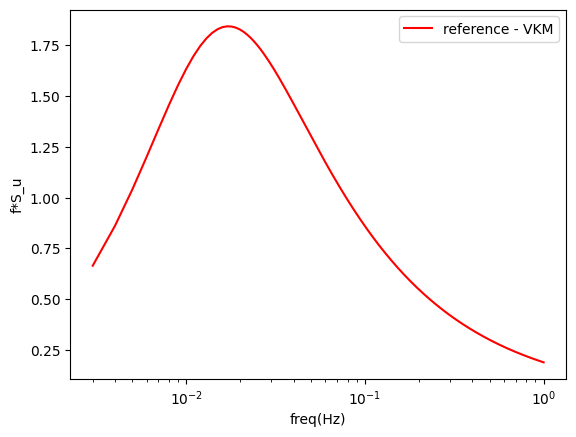

In [10]:
Lu_target = 170
Lv_target = 100
Lw_target = 35
stdU_target = 2.6
stdV_target = 2.2
stdW_target = 1.56
U_target = 20
def ref_von_karman(f):
    x = (Lu_target/U_target) * f 
    y = (Lv_target/U_target) * f 
    z = (Lw_target/U_target) * f 

    denom_x = (1 + 70.0*(x**2)) ** (5/6)
    su_ref = ((4 * Lu_target * (stdU_target)**2) /U_target) / denom_x
    denom_y = (1 + 70.0*4*(y**2)) ** (11/6)
    sv_ref = (((4 * Lv_target * (stdV_target)**2) /U_target) * (1+188.4*4*(y**2))) / denom_y
    denom_z = (1 + 70.0*4*(z**2)) ** (11/6)
    sw_ref = (((4 * Lw_target * (stdW_target)**2) /U_target) * (1+188.4*4*(z**2)))/ denom_z
    return su_ref, sv_ref, sw_ref

f = np.linspace(0.003, 1, 1000)
su_ref, sv_ref, sw_ref = ref_von_karman(f)

plt.figure()
plt.plot(f, (f*su_ref.T), color='r', label="reference - VKM")
# plt.plot(f,su, color='r')
plt.xlabel("freq(Hz)")
plt.ylabel("f*S_u")
plt.xscale("log")
plt.legend(loc="upper right")
plt.show()

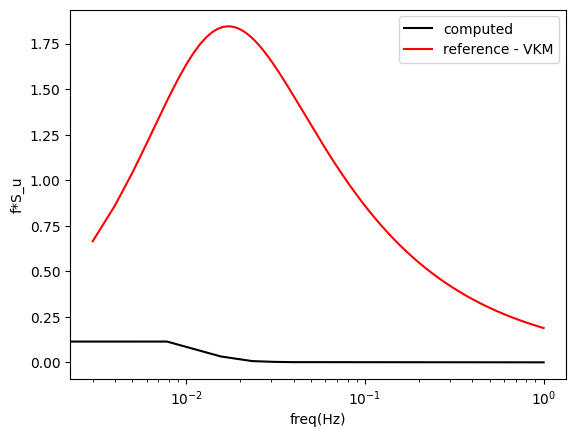

In [12]:
from scipy.signal import welch
fs = 0.1
nperseg = 1
# ts = wind_field.get_uvwt()
u = wind.wind_values[:, 0]
v = wind.wind_values[:, 1]
w = wind.wind_values[:, 2]
F, SU = welch(u, fs=2)
# SU.mean()
# SU = np.mean(SU, axis=1)
# # f, SU = welch(u, fs=fs, nperseg=nperseg, noverlap=nperseg // 2) 
plt.figure()
plt.plot(F, (F*SU.T), color='k', label="computed")
plt.plot(f, (f*su_ref.T), color='r', label="reference - VKM")
# plt.plot(f,su, color='r')
plt.xlabel("freq(Hz)")
plt.ylabel("f*S_u")
plt.xscale("log")
plt.legend(loc="upper right")
plt.show()